# Testing PINN architecture

Notebook to sweep simple architectures and activation functions for the 1D heat equation PINN.

- Single-activation heatmaps over width/depth
- Auto-pick best architecture and compare to analytical solution
- FTCS baseline comparison
- Mixed activation sweep across layers


## Path setup and shared imports

In [1]:
# Make sure the notebook can import from src/ when run inside code/main_clean
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src import *


## Base architecture, hyperparameters, and grid

In [2]:
##################################################################################
# NETWORK ARCHITECTURE (lightweight defaults for quick sweeps)
##################################################################################
num_hidden_neurons = [2, 2]  # Minimal network just to validate notebook flow
opt_met            = 'SGD-adam'
##################################################################################
# HYPERPARAMETERS (increase for final experiments)
##################################################################################
epochs         = 200   # Keep small for notebook iteration; raise to 100+ for report-ready runs
learning_rate  = 0.01  # Placeholder; replace with tuned learning rate before final runs
stop_patience  = 20    # Early-stopping patience (epochs without sufficient improvement)
stop_delta     = 1e-4  # Minimum cost drop to reset patience
seed           = 36    # Shared seed for numpy.random.seed and torch.manual_seed
# ONLY FOR SGD : 
batch_fraction = 0.1  # Fraction of grid used per batch when sampling
##################################################################################
# GRID RESOLUTION (coarse grid for speed; refine later)
##################################################################################
Nx = 30    # Spatial points
Nt = 30    # Temporal points

batch_size = 10
##################################################################################
# MAKE X AND T : 
##################################################################################
t, x, t_torch, x_torch, _ = create_t_and_x_batch_size(Nx,
                                                               Nt,
                                                               batch_fraction)
##################################################################################
# CONFIGURATION INFORMATION : 
##################################################################################
config = make_config(Nx,
                     Nt, 
                     num_hidden_neurons,
                     opt_met, 
                     epochs, 
                     learning_rate, 
                     batch_fraction,
                     batch_size,
                     seed,
                     verbose=True)


--------------------------------------
Configuration information :

Grid resolution         : Nx=30, Nt=30
Network architecture    : [2, 2]
Gradient decent method  : SGD-adam
Learning rate           : 0.01
Epochs                  : 200
Batch fraction          : 0.1
Batch size              : 10
Seed                    : 36
--------------------------------------


## Share context with architecture helpers

In [3]:
# Make src.architecture helpers pick up the current grid/params
set_context(x=x,
            t=t,
            x_torch=x_torch,
            t_torch=t_torch,
            Nx=Nx,
            Nt=Nt,
            epochs=epochs,
            learning_rate=learning_rate,
            seed=seed,
            batch_size=batch_size,
            stop_delta=stop_delta,
            stop_patience=stop_patience)


## Activation functions to test

In [4]:
# Try a small set of standard activation functions
activation_funcs = ['sigmoid', 'tanh', 'relu']


## Heatmap sweep: single activation

Activation: sigmoid, depth 1, width 5
Initial cost:  38.380165100097656
Final cost:  0.45085859298706055
Max absolute difference between the analytical solution and the network: 0.0506064
Final cost: 4.508586e-01
Activation: sigmoid, depth 1, width 10
Initial cost:  55.342437744140625
Final cost:  0.07226499915122986
Max absolute difference between the analytical solution and the network: 0.017503
Final cost: 7.226500e-02
Activation: sigmoid, depth 1, width 20
Initial cost:  42.09579849243164
Final cost:  0.03774300590157509
Max absolute difference between the analytical solution and the network: 0.0111749
Final cost: 3.774301e-02
Activation: sigmoid, depth 1, width 30
Initial cost:  41.59612274169922
Final cost:  0.005836574826389551
Max absolute difference between the analytical solution and the network: 0.0026033
Final cost: 5.836575e-03
Activation: sigmoid, depth 1, width 40
Initial cost:  43.595733642578125
Final cost:  0.004262722097337246
Max absolute difference between the anal

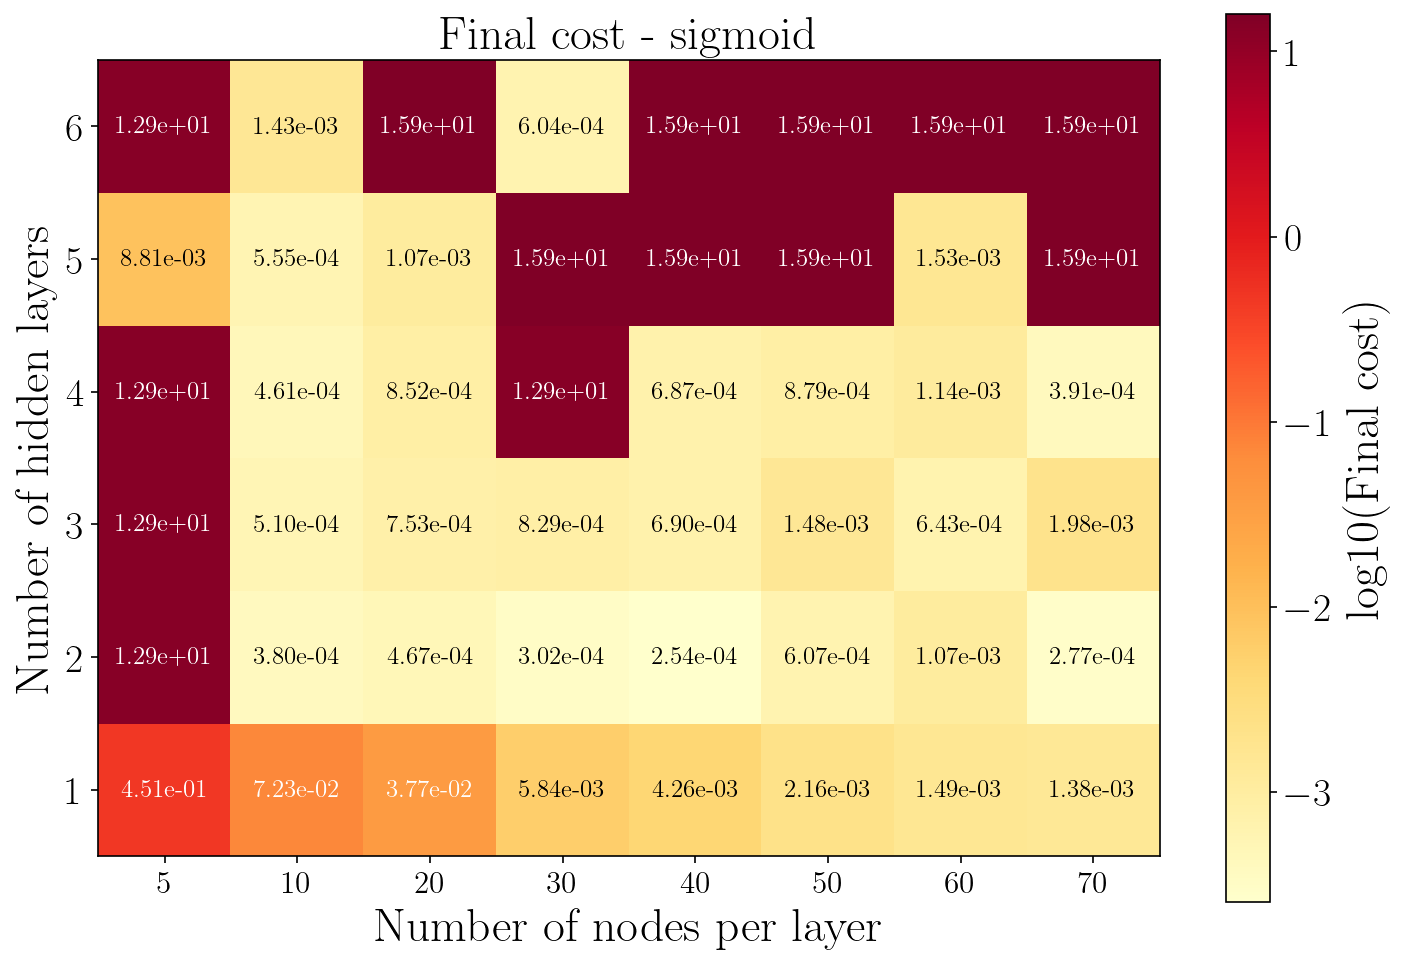

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/heatmap_max_error___sigmoid.pdf


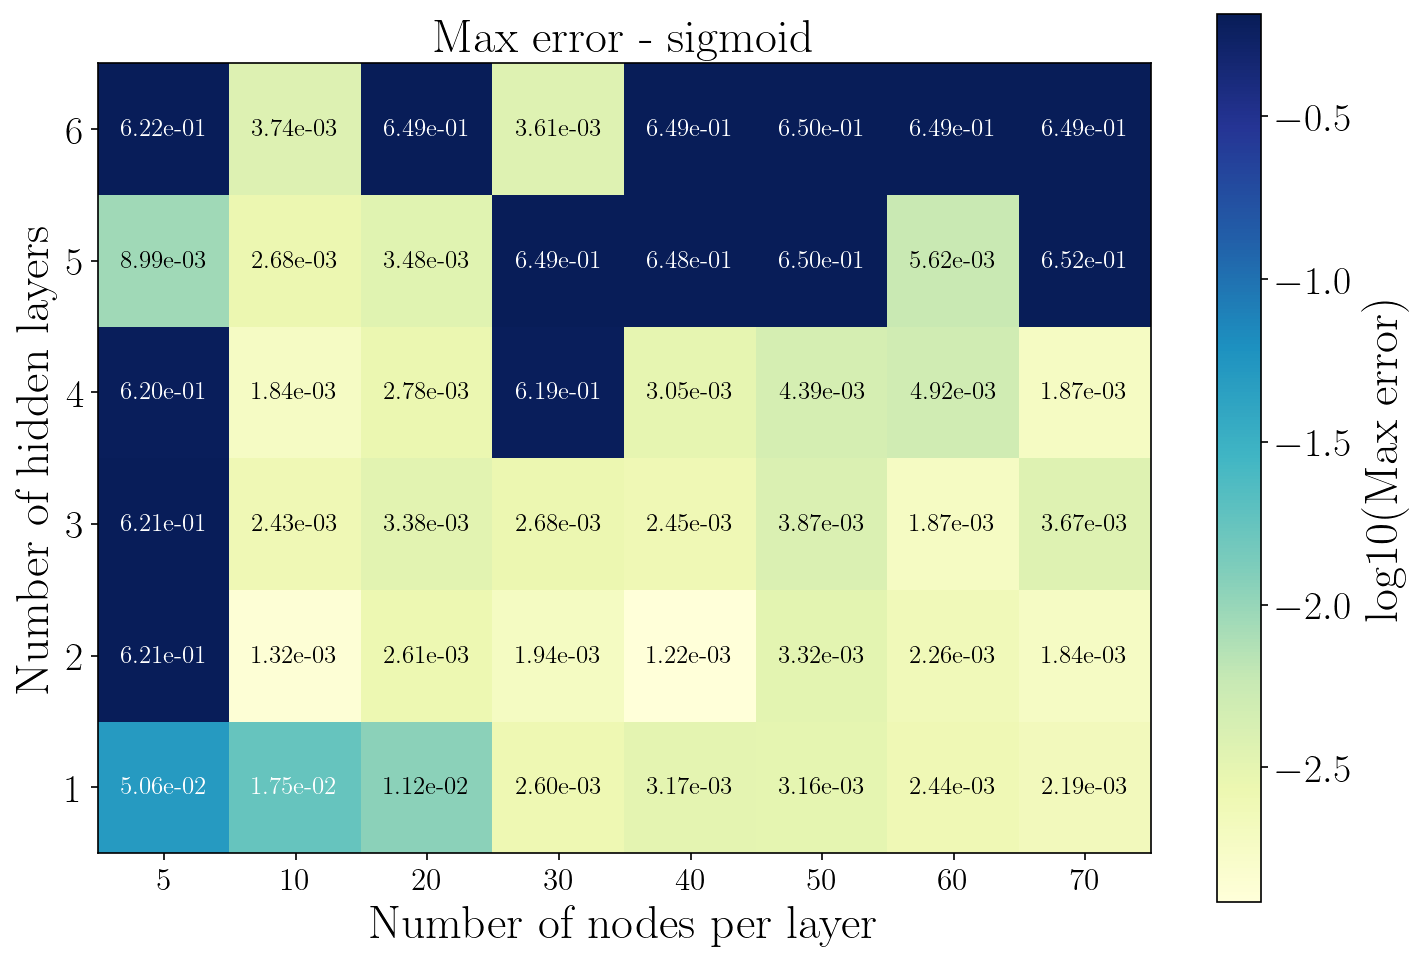

Activation: tanh, depth 1, width 5
Initial cost:  45.571014404296875
Final cost:  0.260480672121048
Max absolute difference between the analytical solution and the network: 0.0484008
Final cost: 2.604807e-01
Activation: tanh, depth 1, width 10
Initial cost:  42.444908142089844
Final cost:  0.02907588891685009
Max absolute difference between the analytical solution and the network: 0.0161955
Final cost: 2.907589e-02
Activation: tanh, depth 1, width 20
Initial cost:  41.866058349609375
Final cost:  0.007096781861037016
Max absolute difference between the analytical solution and the network: 0.00640823
Final cost: 7.096782e-03
Activation: tanh, depth 1, width 30
Initial cost:  49.475833892822266
Final cost:  0.001256723189726472
Max absolute difference between the analytical solution and the network: 0.00172004
Final cost: 1.256723e-03
Activation: tanh, depth 1, width 40
Initial cost:  45.9138069152832
Final cost:  0.0007257714751176536
Max absolute difference between the analytical solut

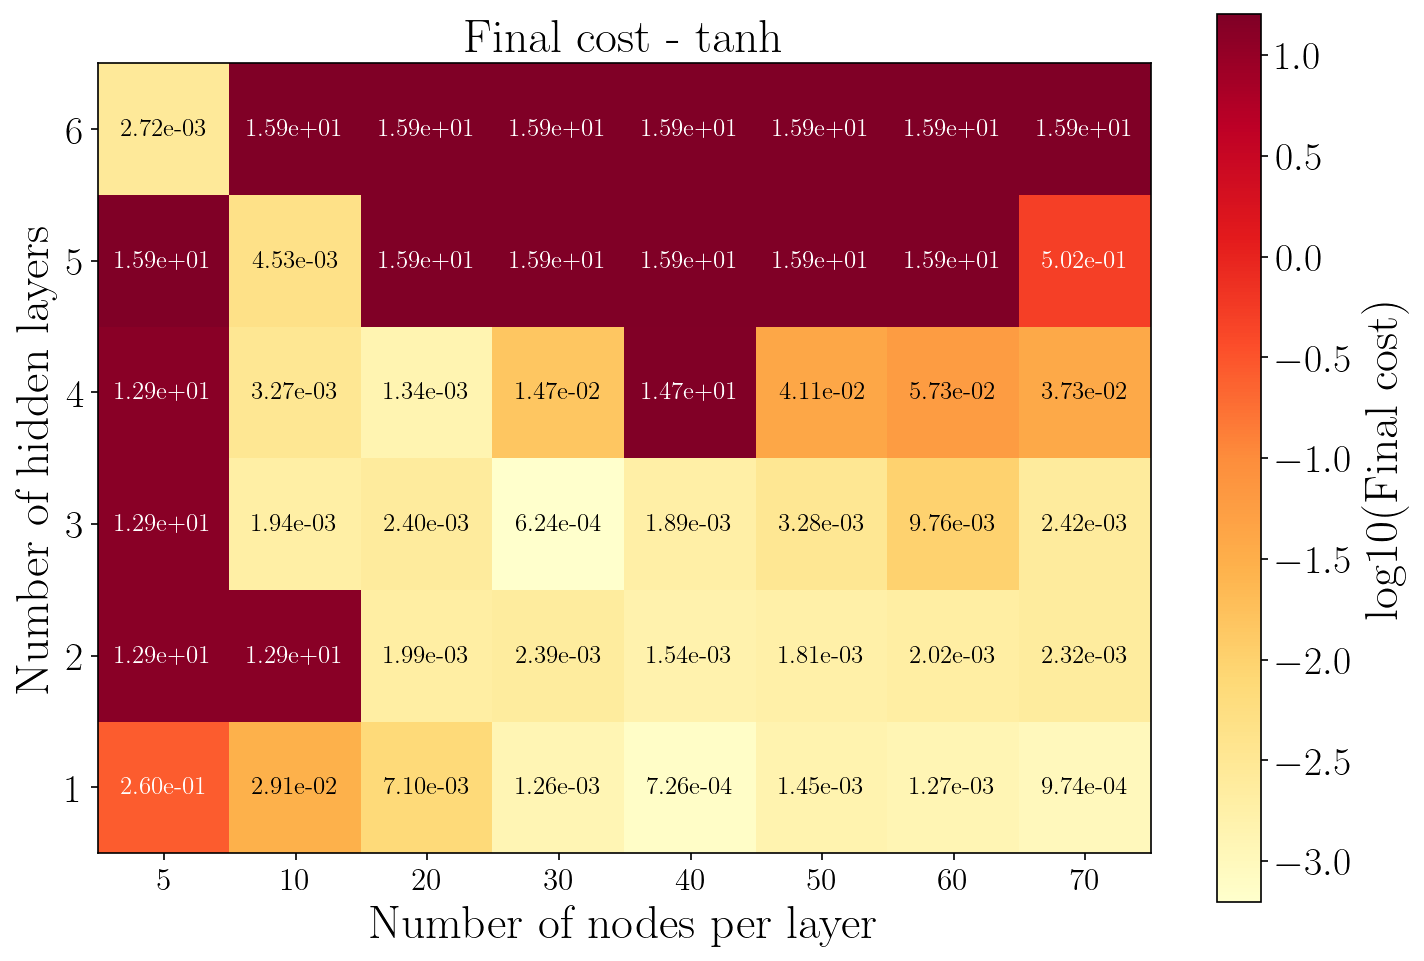

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/heatmap_max_error___tanh.pdf


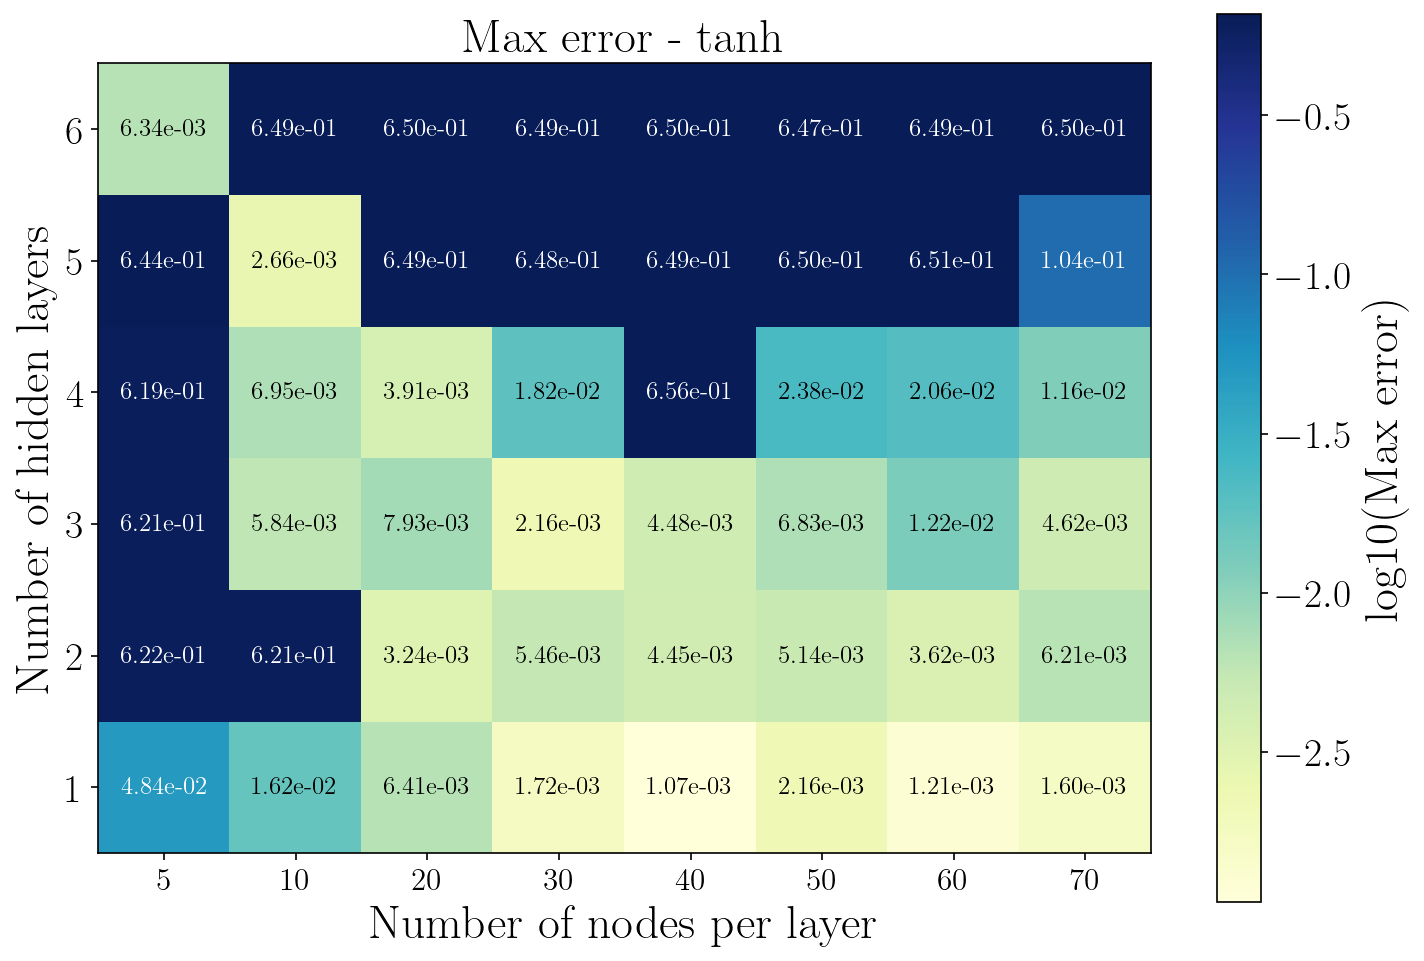

Activation: relu, depth 1, width 5
Initial cost:  43.74779510498047
Final cost:  11.494952201843262
Max absolute difference between the analytical solution and the network: 0.43222
Final cost: 1.149495e+01
Activation: relu, depth 1, width 10
Initial cost:  49.253150939941406
Final cost:  11.500438690185547
Max absolute difference between the analytical solution and the network: 0.436752
Final cost: 1.150044e+01
Activation: relu, depth 1, width 20
Initial cost:  42.56719970703125
Final cost:  3.368176221847534
Max absolute difference between the analytical solution and the network: 0.397694
Final cost: 3.368176e+00
Activation: relu, depth 1, width 30
Initial cost:  44.412353515625
Final cost:  1.807385802268982
Max absolute difference between the analytical solution and the network: 0.363547
Final cost: 1.807386e+00
Activation: relu, depth 1, width 40
Initial cost:  44.40138626098633
Final cost:  1.380771517753601
Max absolute difference between the analytical solution and the network: 

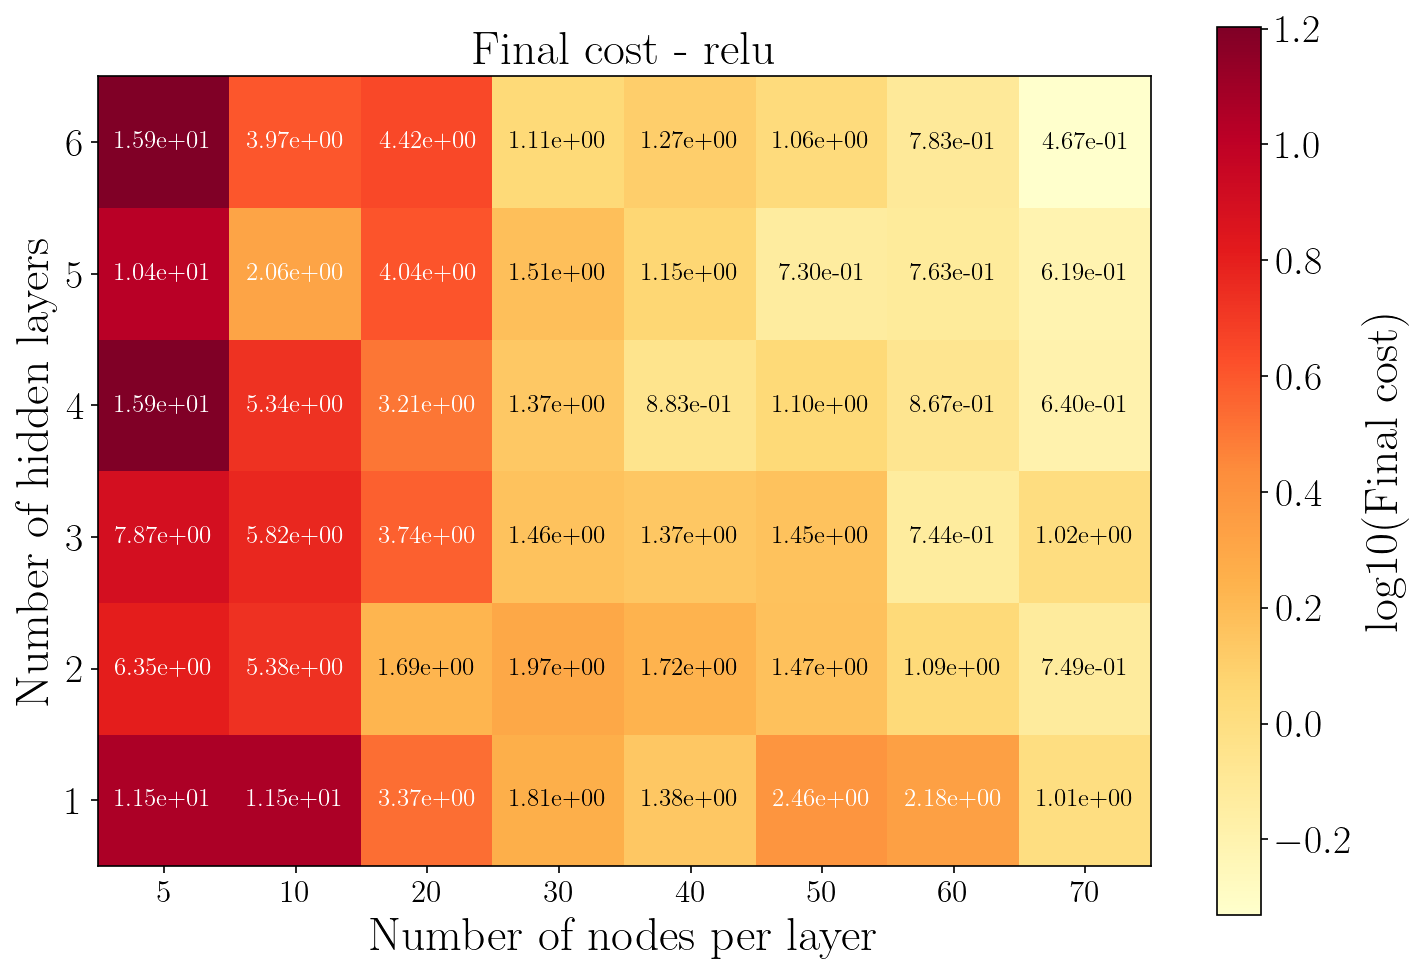

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/heatmap_max_error___relu.pdf


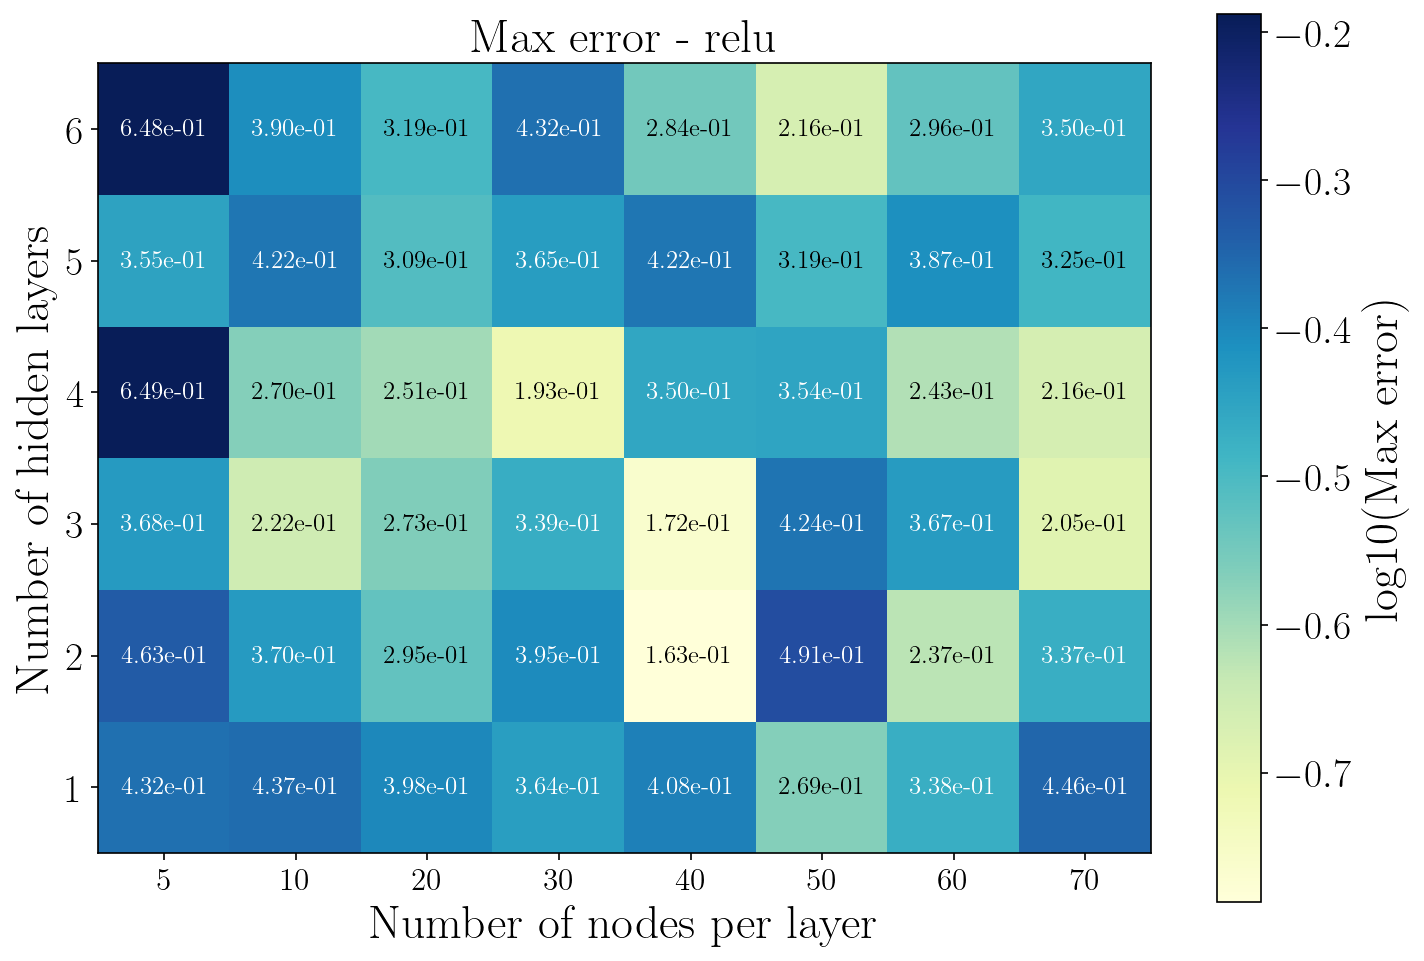

In [5]:
# Heatmap sweep over width/depth for each activation
depth_grid = [1, 2, 3, 4, 5, 6]
width_grid = [5, 10, 20, 30, 40, 50, 60, 70] 

heatmap_results = {}
for activation_function in activation_funcs:
    cost_grid = np.zeros((len(depth_grid), len(width_grid)))
    diff_grid = np.zeros((len(depth_grid), len(width_grid)))
    for di, depth in enumerate(depth_grid):
        for wi, width in enumerate(width_grid):
            print(f'Activation: {activation_function}, depth {depth}, width {width}')
            # Train and score this architecture/activation combination
            final_cost, max_abs_diff = evaluate_architecture(width, depth, activation_function, stop_delta=stop_delta, stop_patience=stop_patience)
            cost_grid[di, wi] = final_cost
            diff_grid[di, wi] = max_abs_diff
    heatmap_results[activation_function] = {'cost': cost_grid, 'max_abs_diff': diff_grid}
    # Visualize cost and error surfaces for this activation
    plot_metric_heatmap(cost_grid, width_grid, depth_grid, f'Final cost - {activation_function}', 'Final cost', cmap='YlOrRd', log_scale=True)
    plot_metric_heatmap(diff_grid, width_grid, depth_grid, f'Max error - {activation_function}', 'Max error', cmap='YlGnBu', log_scale=True)


## Pick best single-activation model and compare

Best from heatmap (by final cost): sigmoid depth=2, width=40 | cost=2.5371e-04, maxerror=1.2165e-03
Initial cost:  49.2901725769043
Final cost:  0.000253706646617502
Max absolute difference between the analytical solution and the network: 0.0012165
Final cost: 2.537066e-04
Auto-selected architecture final cost: 2.5371e-04, max error: 1.2165e-03
Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/pinn_solution_sigmoid_40-40.pdf


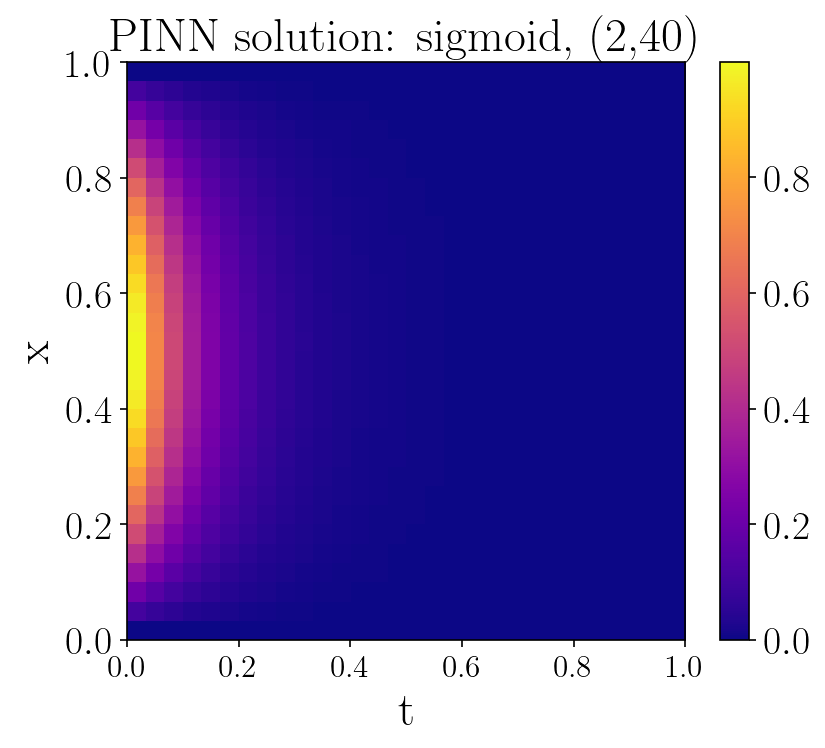

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/analytical_solution.pdf


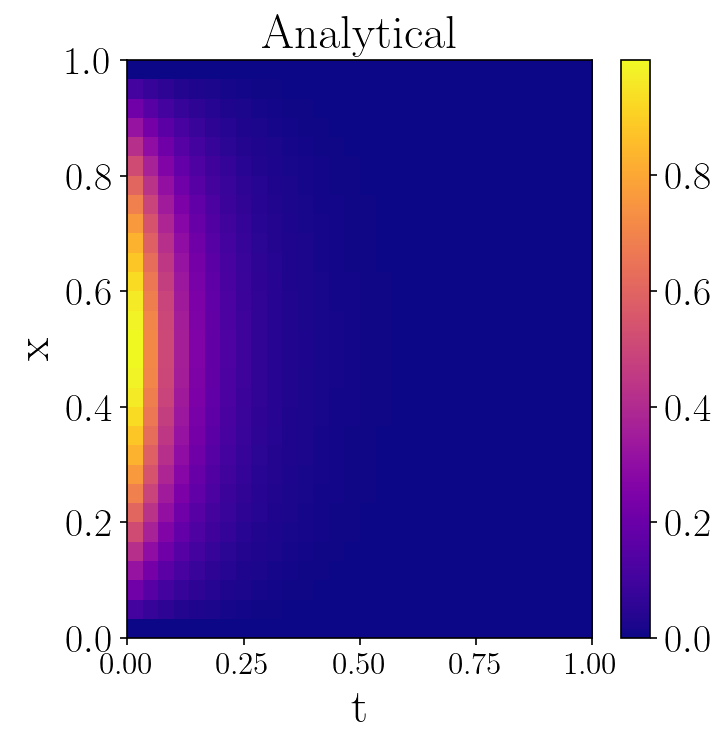

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/pinn_minus_analytical_sigmoid_40-40.pdf


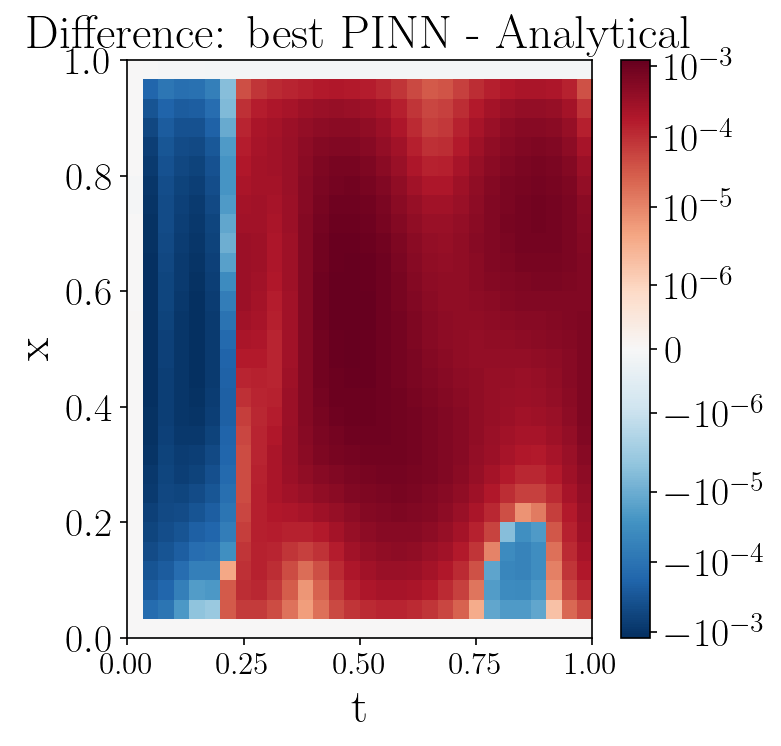

In [6]:
# Auto-select best architecture from heatmap_results and compare vs analytical
try:
    heatmap_results
    depth_grid
    width_grid
except NameError:
    print('Run the heatmap sweep first to populate heatmap_results, depth_grid, width_grid.')
else:
    best_info = None
    for act, vals in heatmap_results.items():
        cost_grid = vals['cost']
        diff_grid = vals['max_abs_diff']
        idx = np.unravel_index(np.argmin(cost_grid), cost_grid.shape)
        depth = depth_grid[idx[0]]
        width = width_grid[idx[1]]
        cost = float(cost_grid[idx])
        diff = float(diff_grid[idx])
        if (best_info is None) or (cost < best_info['cost']):
            best_info = {'activation': act, 'depth': depth, 'width': width, 'cost': cost, 'diff': diff}
    if best_info is None:
        print('heatmap_results is empty; rerun the sweep.')
    else:
        print(f"Best from heatmap (by final cost): {best_info['activation']} depth={best_info['depth']}, width={best_info['width']} | cost={best_info['cost']:.4e}, maxerror={best_info['diff']:.4e}")
        # Train the best candidate found in the sweep
        best_architecture = build_architecture(best_info['width'], best_info['depth'])
        P_best, history_best = train_PINN_pyTorch(x_torch,
                            t_torch,
                            best_architecture,
                            epochs,
                            learning_rate,
                            best_info['activation'],
                            seed,
                            optimization_method='SGD-adam',
                            batch_size=batch_size,
                            shuffle=True,
                            replacement=False,
                            verbose=False,
                            debug=False,
                            stop_patience=stop_patience,
                            stop_delta=stop_delta)
        # Evaluate against the analytical solution on the full grid
        max_abs_diff, final_cost, g_dnn_ag, G_analytical, diff_ag = comp_max_abs_diff(Nx, Nt, x_torch, t_torch, P_best, best_architecture, best_info['activation'])
        print('Auto-selected architecture final cost: {:.4e}, max error: {:.4e}'.format(final_cost, max_abs_diff))
        plot_an_nn_diff(g_dnn_ag, G_analytical, diff_ag, best_info['activation'], best_architecture)


## FTCS baseline vs best single-activation PINN

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/FTCS.pdf


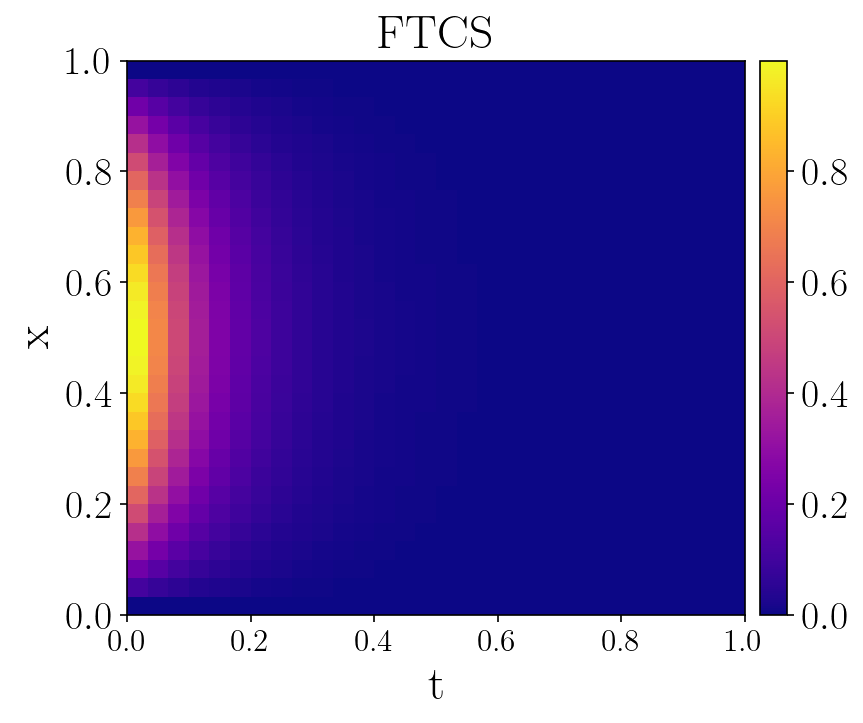

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/best_pinn_single_minus_ftcs.pdf


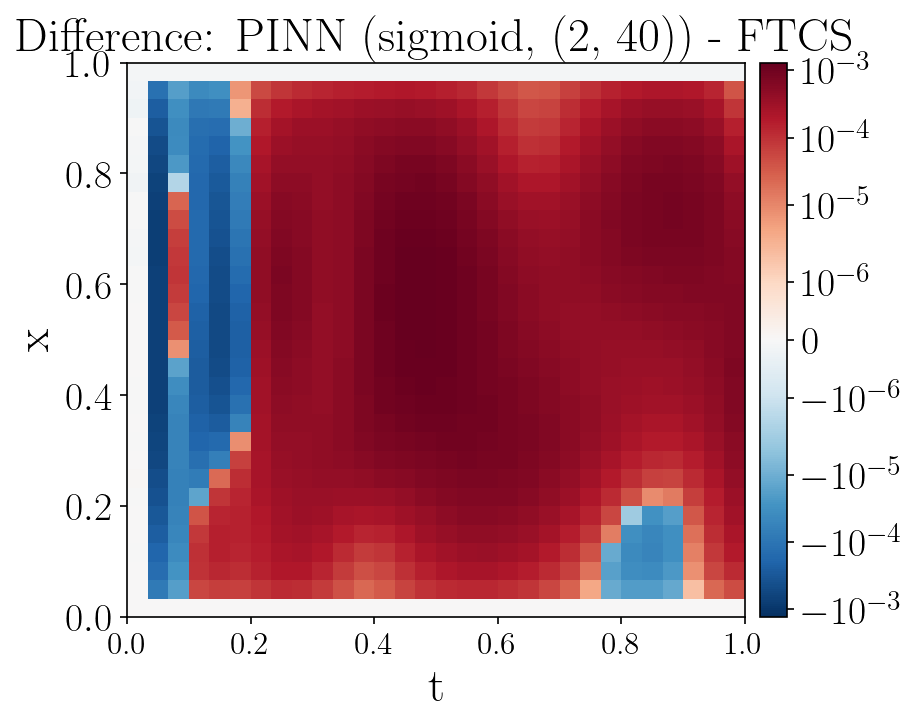

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/ftcs_minus_analytical.pdf


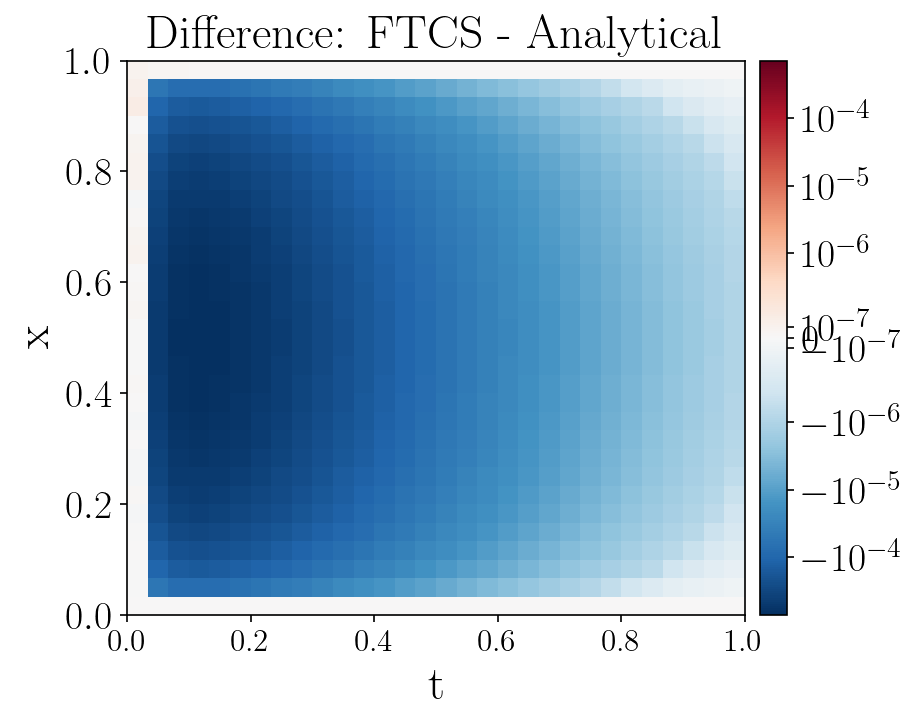

In [7]:
# Compare FTCS baseline against the auto-selected best PINN solution
try:
    g_dnn_ag
    G_analytical
except NameError:
    print('Run the auto-selected best-architecture cell first to populate g_dnn_ag and G_analytical.')
else:
    import numpy as np
    from matplotlib.colors import SymLogNorm

    # Explicit FTCS baseline (for reference)
    def ftcs_solution(x, t):
        dx = float(x[1] - x[0])
        t_end = float(t[-1])
        # Stable time step for explicit Euler + central differences
        dt_stable = 0.5 * dx**2
        nt = int(np.ceil(t_end / dt_stable)) + 1
        dt = t_end / (nt - 1)
        alpha = dt / dx**2

        # Initial condition + boundaries
        u = np.sin(np.pi * x)
        u[0] = 0.0
        u[-1] = 0.0
        sol = np.zeros((nt, len(x)))
        sol[0] = u

        for n in range(1, nt):
            u_new = u.copy()
            u_new[1:-1] = u[1:-1] + alpha * (u[2:] - 2*u[1:-1] + u[:-2])
            u_new[0] = 0.0
            u_new[-1] = 0.0
            u = u_new
            sol[n] = u

        t_grid = np.linspace(0.0, t_end, nt)
        sol_interp = np.vstack([np.interp(t, t_grid, sol[:, i]) for i in range(len(x))])
        return sol_interp  # shape (len(x), len(t))

    ftcs_grid = ftcs_solution(x, t)

    plt.imshow(ftcs_grid,
               origin='lower',
               extent=[x.min(), x.max(), t.min(), t.max()],
               aspect='auto',
               cmap='plasma')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('FTCS')
    plt.colorbar(pad=0.02)
    save_fig('FTCS')
    plt.show()

    # PINN - FTCS
    pinn_minus_ftcs = g_dnn_ag - ftcs_grid
    v = np.max(np.abs(pinn_minus_ftcs))
    v = v if v > 0 else 1e-12
    linthresh = max(1e-10, v * 1e-3)
    norm = SymLogNorm(linthresh=linthresh, vmin=-v, vmax=v)
    plt.imshow(pinn_minus_ftcs,
               origin='lower',
               extent=[x.min(), x.max(), t.min(), t.max()],
               aspect='auto',
               cmap='RdBu_r',
               norm=norm)
    plt.xlabel('t')
    plt.ylabel('x')
    pinn_label = None
    try:
        best_info
    except NameError:
        pinn_label = None
    else:
        pinn_label = f"{best_info['activation']}, ({best_info['depth']}, {best_info['width']})"
    title_text = 'Difference: PINN - FTCS' if pinn_label is None else f'Difference: PINN ({pinn_label}) - FTCS'
    plt.title(title_text)
    plt.colorbar(pad=0.02)
    save_fig('best_pinn_single_minus_ftcs')
    plt.show()

    # FTCS - Analytical
    ftcs_minus_analytical = ftcs_grid - G_analytical
    v = np.max(np.abs(ftcs_minus_analytical))
    v = v if v > 0 else 1e-12
    linthresh = max(1e-10, v * 1e-3)
    norm = SymLogNorm(linthresh=linthresh, vmin=-v, vmax=v)
    plt.imshow(ftcs_minus_analytical,
               origin='lower',
               extent=[x.min(), x.max(), t.min(), t.max()],
               aspect='auto',
               cmap='RdBu_r',
               norm=norm)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Difference: FTCS - Analytical')
    plt.colorbar(pad=0.02)
    save_fig('ftcs_minus_analytical')
    plt.show()


## Mixed activations per layer

Depth 1, width 5, activations sigmoid
Initial cost:  38.380165100097656
Final cost:  0.45085859298706055
Max absolute difference between the analytical solution and the network: 0.0506064
Final cost: 4.508586e-01
Depth 1, width 5, activations tanh
Initial cost:  45.571014404296875
Final cost:  0.260480672121048
Max absolute difference between the analytical solution and the network: 0.0484008
Final cost: 2.604807e-01
Depth 1, width 10, activations sigmoid
Initial cost:  55.342437744140625
Final cost:  0.07226499915122986
Max absolute difference between the analytical solution and the network: 0.017503
Final cost: 7.226500e-02
Depth 1, width 10, activations tanh
Initial cost:  42.444908142089844
Final cost:  0.02907588891685009
Max absolute difference between the analytical solution and the network: 0.0161955
Final cost: 2.907589e-02
Depth 1, width 20, activations sigmoid
Initial cost:  42.09579849243164
Final cost:  0.03774300590157509
Max absolute difference between the analytical sol

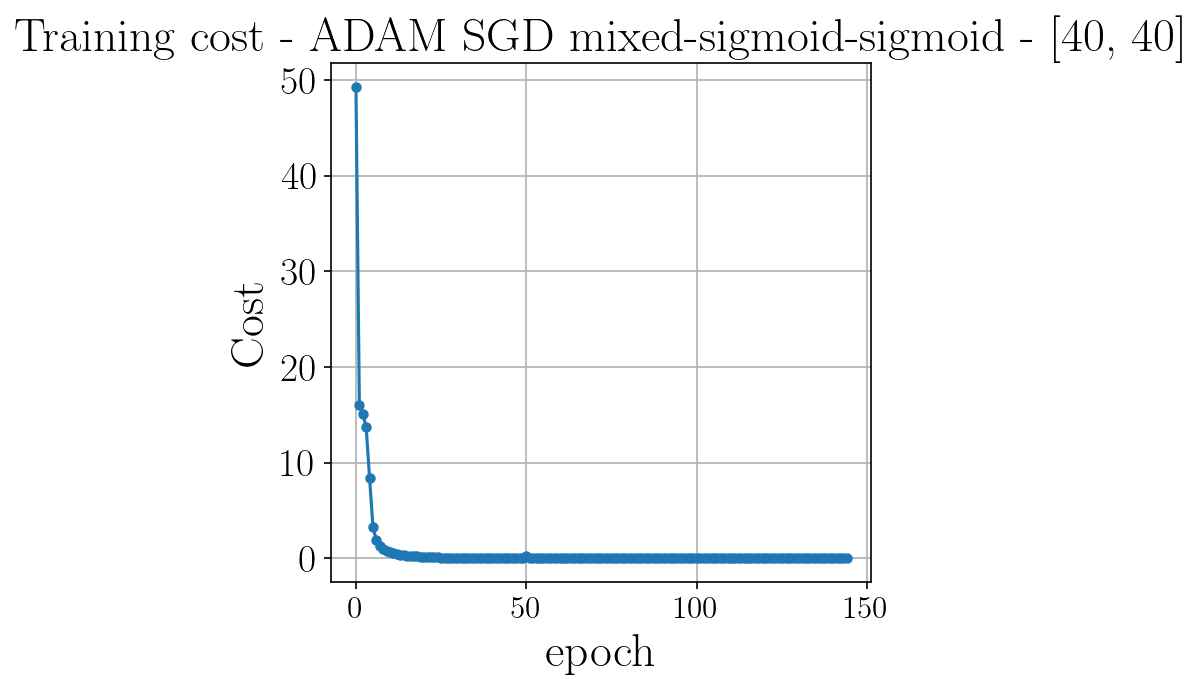

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/pinn_solution_mixed-sigmoid-sigmoid_40-40.pdf


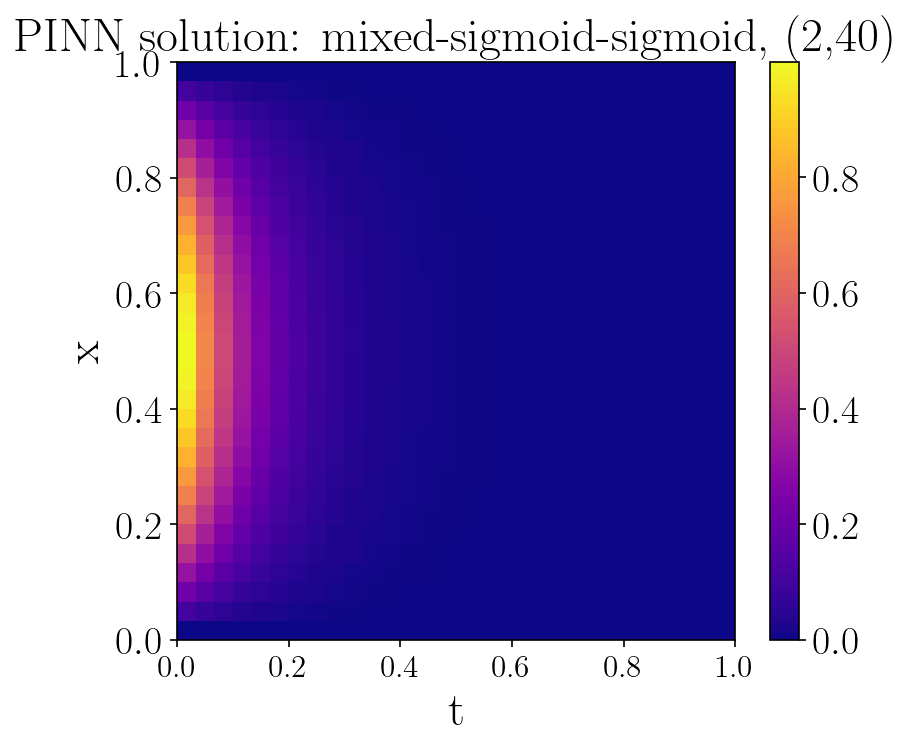

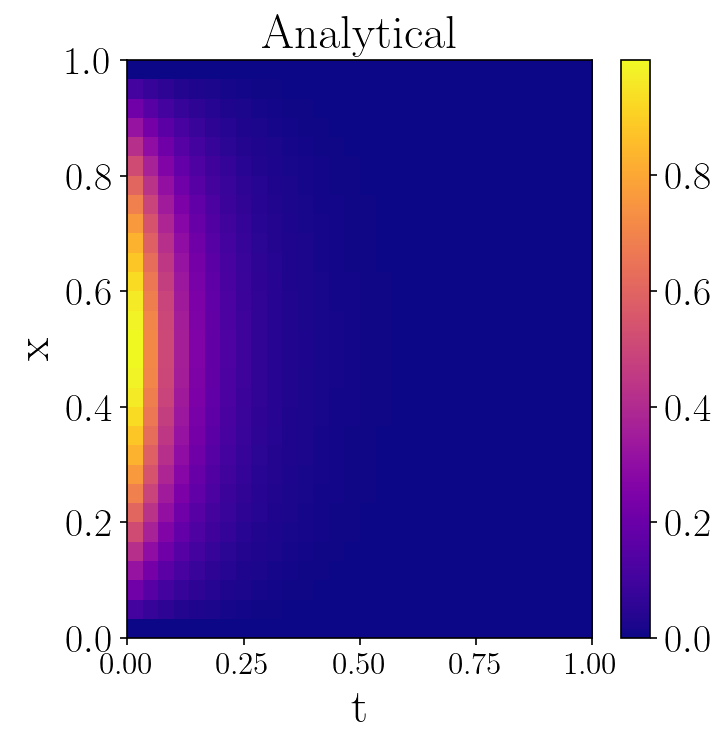

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/pinn_minus_analytical_mixed-sigmoid-sigmoid_40-40.pdf


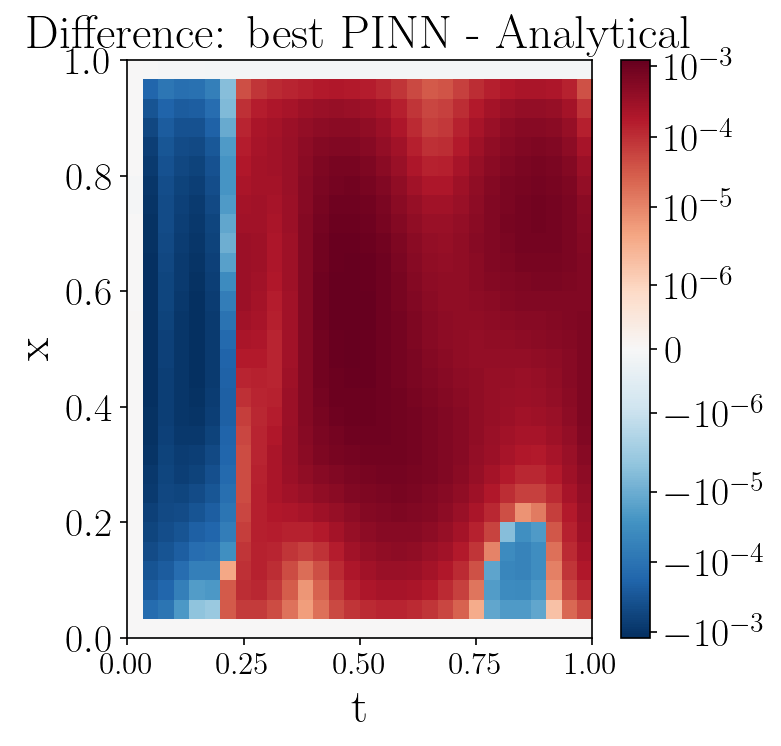

In [8]:
# Sweep mixed activation combinations per layer across width/depth grid
from itertools import product

# Use existing grids if defined, else fall back to the heatmap defaults
try:
    depth_grid
    width_grid
except NameError:
    depth_grid = [1, 2, 3, 4, 5, 6]
    width_grid = [5, 10, 20, 30, 40, 50, 60, 70]

combo_results = []
best_combo = None

for depth in depth_grid:
    activation_funcs_mixed = ['sigmoid', 'tanh']
    activation_sequences = list(product(activation_funcs_mixed, repeat=depth))
    for width in width_grid:
        architecture = build_architecture(width, depth)
        for seq in activation_sequences:
            activation_choice = list(seq)  # allows layer-wise activations
            label = '-'.join(seq)
            print(f"Depth {depth}, width {width}, activations {label}")
            # Train with the given per-layer activation pattern
            P_combo, history_combo = train_PINN_pyTorch(x_torch,
                                    t_torch,
                                    architecture,
                                    epochs,
                                    learning_rate,
                                    activation_choice,
                                    seed,
                                    optimization_method='SGD-adam',
                                    batch_size=batch_size,
                                    shuffle=True,
                                    replacement=False,
                                    verbose=False,
                                    debug=False,
                                    stop_patience=stop_patience,
                                    stop_delta=stop_delta)
            max_abs_diff, final_cost, g_dnn_ag, G_analytical, diff_ag = comp_max_abs_diff(Nx, Nt, x_torch, t_torch, P_combo, architecture, activation_choice)
            combo_results.append({
                'depth': depth,
                'width': width,
                'activations': activation_choice,
                'label': label,
                'final_cost': final_cost,
                'max_abs_diff': max_abs_diff,
            })
            # Track the best-performing configuration by final cost
            if (best_combo is None) or (final_cost < best_combo['final_cost']):
                best_combo = {
                    'depth': depth,
                    'width': width,
                    'activations': activation_choice,
                    'label': label,
                    'final_cost': final_cost,
                    'max_abs_diff': max_abs_diff,
                    'history': history_combo,
                    'g_dnn_ag': g_dnn_ag,
                    'G_analytical': G_analytical,
                    'diff_ag': diff_ag,
                }

if best_combo is None:
    print('No combinations were evaluated. Check grids/inputs.')
else:
    print(f"Best combo (by final cost): depth={best_combo['depth']}, width={best_combo['width']}, activations={best_combo['label']} | cost={best_combo['final_cost']:.4e}, maxerror={best_combo['max_abs_diff']:.4e}")
    plot_cost_history(best_combo['history'], f"mixed-{best_combo['label']}", build_architecture(best_combo['width'], best_combo['depth']))
    plot_an_nn_diff(best_combo['g_dnn_ag'], best_combo['G_analytical'], best_combo['diff_ag'], f"mixed-{best_combo['label']}", build_architecture(best_combo['width'], best_combo['depth']))


## Plot cached best mixed model

Best combo (cached): depth=2, width=40, activations=sigmoid-sigmoid | cost=2.5371e-04, maxerror=1.2165e-03
Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/training_cost_mixed_sigmoid-sigmoid_40x2.pdf


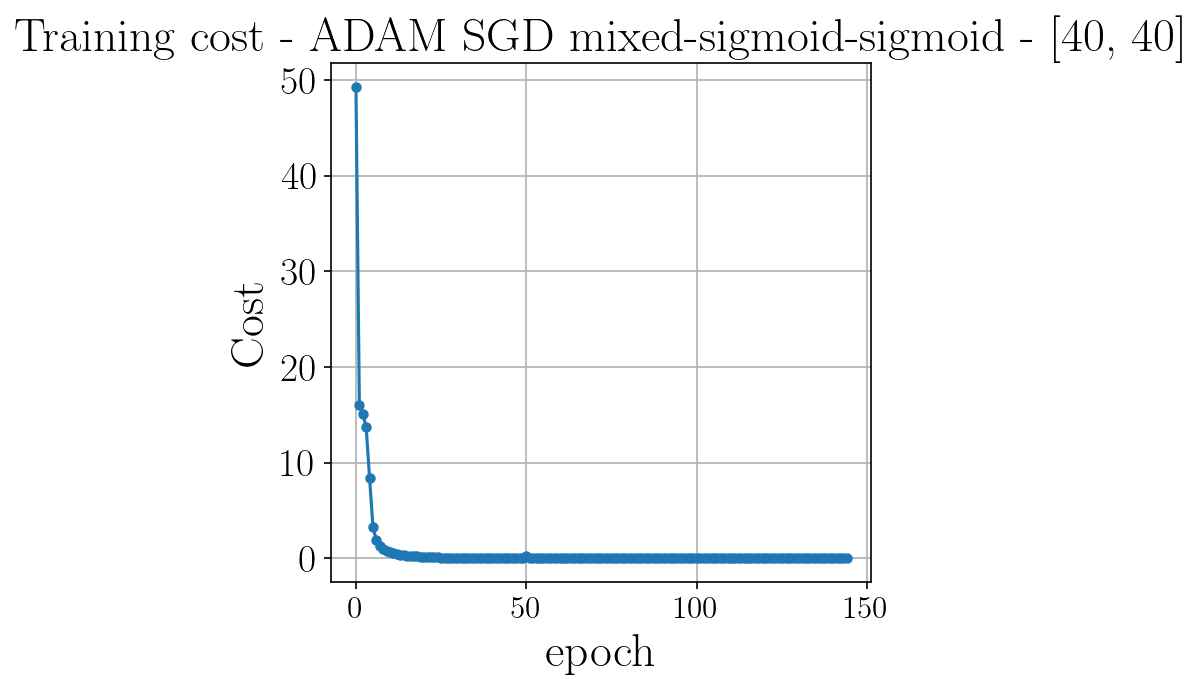

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/pinn_minus_analytical_mixed_sigmoid-sigmoid_40x2.pdf


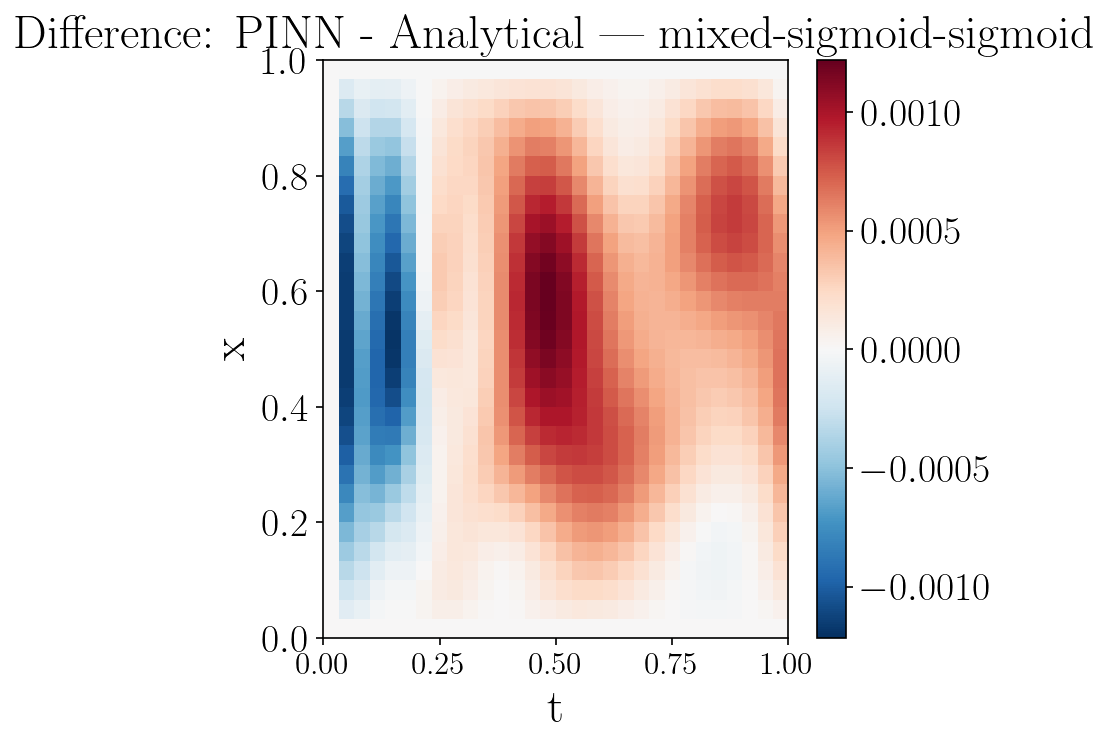

In [9]:
# Plot the best mixed-activation model found (no retraining)
try:
    best_combo
except NameError:
    print('Run the mixed-activation sweep cell first to populate best_combo.')
else:
    if best_combo is None:
        print('best_combo is empty; rerun the sweep cell.')
    else:
        depth = best_combo['depth']
        width = best_combo['width']
        label = best_combo['label']
        architecture = build_architecture(width, depth)
        print(f"Best combo (cached): depth={depth}, width={width}, activations={label} | cost={best_combo['final_cost']:.4e}, maxerror={best_combo['max_abs_diff']:.4e}")
        plot_cost_history(best_combo['history'], f"mixed-{label}", architecture, save_name=f"training_cost_mixed_{label}_{width}x{depth}")
        # Centered difference colormap at 0
        v = float(np.max(np.abs(best_combo['diff_ag'])))
        v = v if v > 0 else 1e-12
        plt.figure(figsize=(5,5))
        plt.imshow(best_combo['diff_ag'],
                   origin='lower',
                   extent=[x.min(), x.max(), t.min(), t.max()],
                   aspect='auto',
                   cmap='RdBu_r',
                   vmin=-v,
                   vmax=v)
        plt.xlabel('t')
        plt.ylabel('x')
        plt.title(f'Difference: PINN - Analytical | mixed-{label}')
        plt.colorbar()
        save_fig(f'pinn_minus_analytical_mixed_{label}_{width}x{depth}')
        plt.show()


## PINN vs FTCS for best mixed activation

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/ftcs_grid_mixed_sigmoid-sigmoid_40x2.pdf


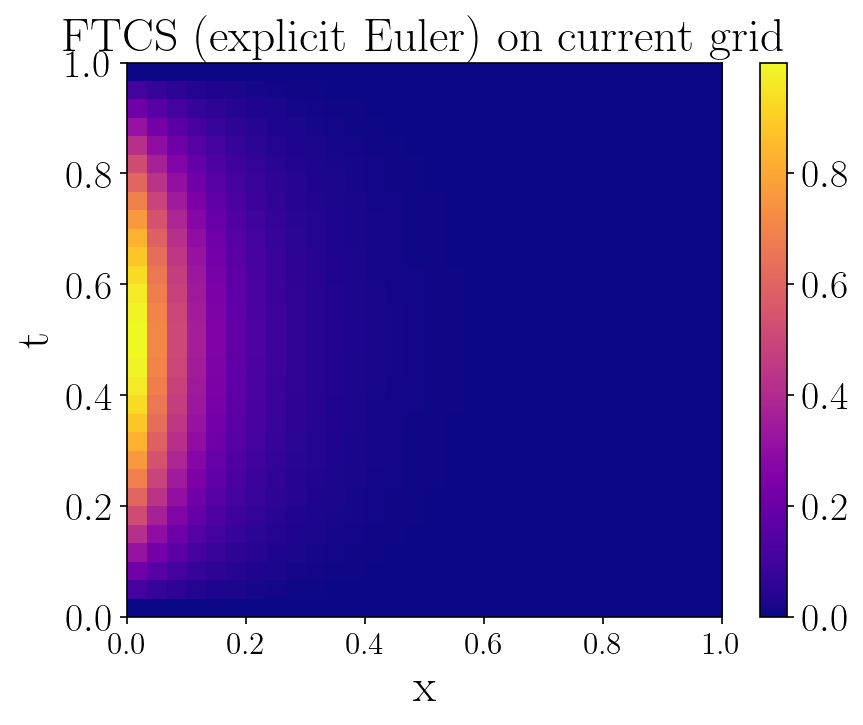

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/pinn_minus_ftcs_mixed_sigmoid-sigmoid_40x2.pdf


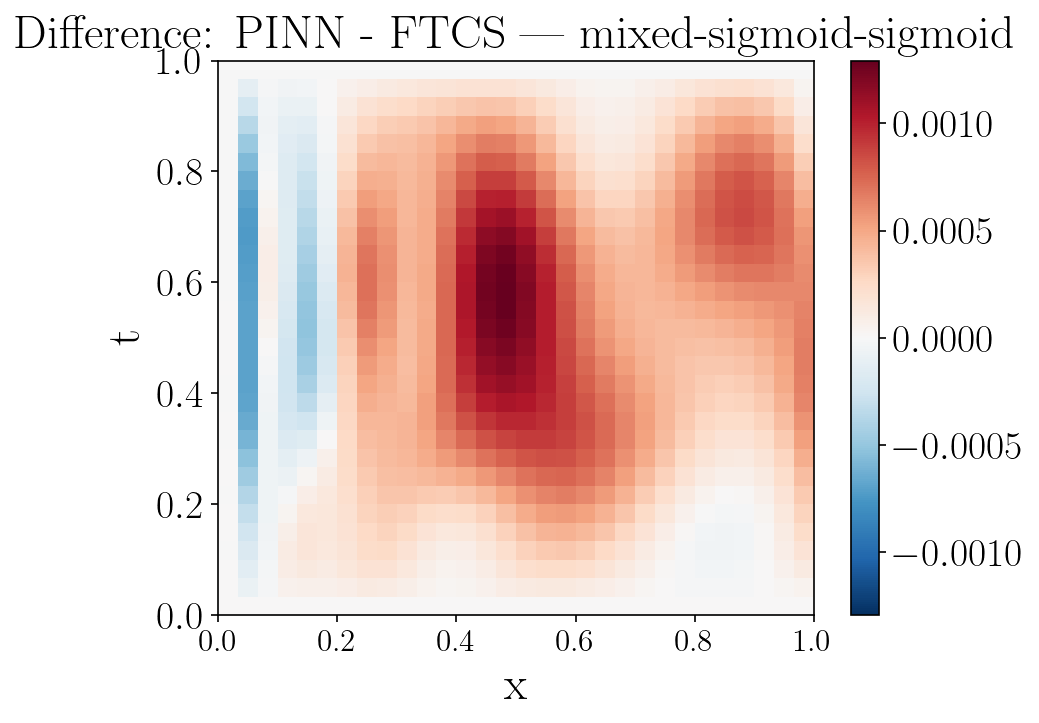

In [10]:
# Plot PINN - FTCS for the cached best mixed-activation model (no retraining)
try:
    best_combo
except NameError:
    print('Run the mixed-activation sweep cell first to populate best_combo.')
else:
    if best_combo is None:
        print('best_combo is empty; rerun the sweep cell.')
    else:
        import numpy as np

        def ftcs_solution(x, t):
            dx = float(x[1] - x[0])
            t_end = float(t[-1])
            dt_stable = 0.5 * dx**2
            nt = int(np.ceil(t_end / dt_stable)) + 1
            dt = t_end / (nt - 1)
            alpha = dt / dx**2
            u = np.sin(np.pi * x)
            u[0] = 0.0
            u[-1] = 0.0
            sol = np.zeros((nt, len(x)))
            sol[0] = u
            for n in range(1, nt):
                u_new = u.copy()
                u_new[1:-1] = u[1:-1] + alpha * (u[2:] - 2*u[1:-1] + u[:-2])
                u_new[0] = 0.0
                u_new[-1] = 0.0
                u = u_new
                sol[n] = u
            t_grid = np.linspace(0.0, t_end, nt)
            sol_interp = np.vstack([np.interp(t, t_grid, sol[:, i]) for i in range(len(x))])
            return sol_interp  # shape (len(x), len(t))

        pinn_grid = best_combo['g_dnn_ag']
        ftcs_grid = ftcs_solution(x, t)

        plt.imshow(ftcs_grid,
                   origin='lower',
                   extent=[x.min(), x.max(), t.min(), t.max()],
                   aspect='auto',
                   cmap='plasma')
        plt.xlabel('x')
        plt.ylabel('t')
        plt.title('FTCS (explicit Euler) on current grid')
        plt.colorbar()
        save_fig(f"ftcs_grid_mixed_{best_combo['label']}_{best_combo['width']}x{best_combo['depth']}")
        plt.show()

        pinn_minus_ftcs = pinn_grid - ftcs_grid
        v = float(np.max(np.abs(pinn_minus_ftcs)))
        v = v if v > 0 else 1e-12
        plt.imshow(pinn_minus_ftcs,
                   origin='lower',
                   extent=[x.min(), x.max(), t.min(), t.max()],
                   aspect='auto',
                   cmap='RdBu_r',
                   vmin=-v,
                   vmax=v)
        plt.xlabel('x')
        plt.ylabel('t')
        plt.title(f'Difference: PINN - FTCS | mixed-{best_combo["label"]}')
        plt.colorbar()
        save_fig(f"pinn_minus_ftcs_mixed_{best_combo['label']}_{best_combo['width']}x{best_combo['depth']}")
        plt.show()
